Analysis of Iris Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('iris.csv')
print("Dataset loaded successfully!\n")

Dataset loaded successfully!



In [11]:
print("📋 Dataset Info:\n")
df.info()

print("\n🔍 First 5 rows:\n")
display(df.head())

print("\n❓ Missing Values:\n")
print(df.isnull().sum())

print("\n🌺 Species Distribution:\n")
print(df['Species'].value_counts())

📋 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

🔍 First 5 rows:



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



❓ Missing Values:

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

🌺 Species Distribution:

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
df_clean = df.copy()

df_clean['Species'] = df_clean['Species'].str.replace('Iris-', '').str.strip().str.lower()

In [15]:
valid_species = ['setosa', 'versicolor', 'virginica']
df_clean = df_clean[df_clean['Species'].isin(valid_species)]

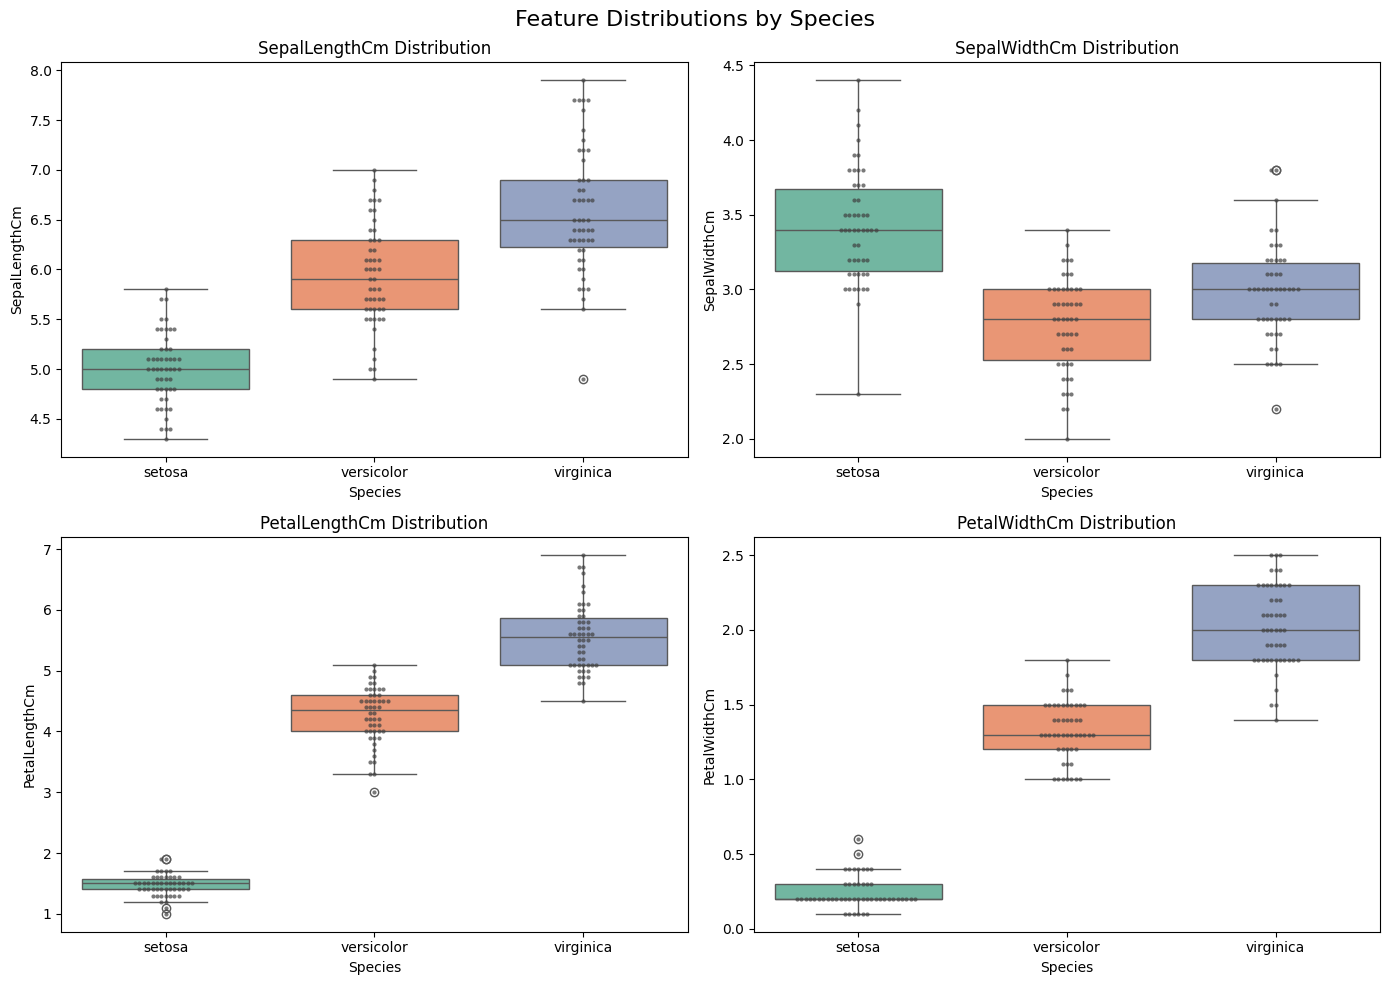

In [ ]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(14, 10))
plt.suptitle('Feature Distributions by Species', fontsize=16)

for i, feature in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    
    # Corrected boxplot with hue parameter
    sns.boxplot(
        x='Species', 
        y=feature, 
        data=df_clean, 
        hue='Species',  
        palette='Set2',
        legend=False    
    )
    
   
    sns.swarmplot(
        x='Species', 
        y=feature, 
        data=df_clean, 
        color='.25', 
        alpha=0.7,
        size=3  
    )
    
    plt.title(f'{feature} Distribution')
    plt.xlabel('Species')
    
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=120)
plt.show()

Pairwise Feature Relationships:


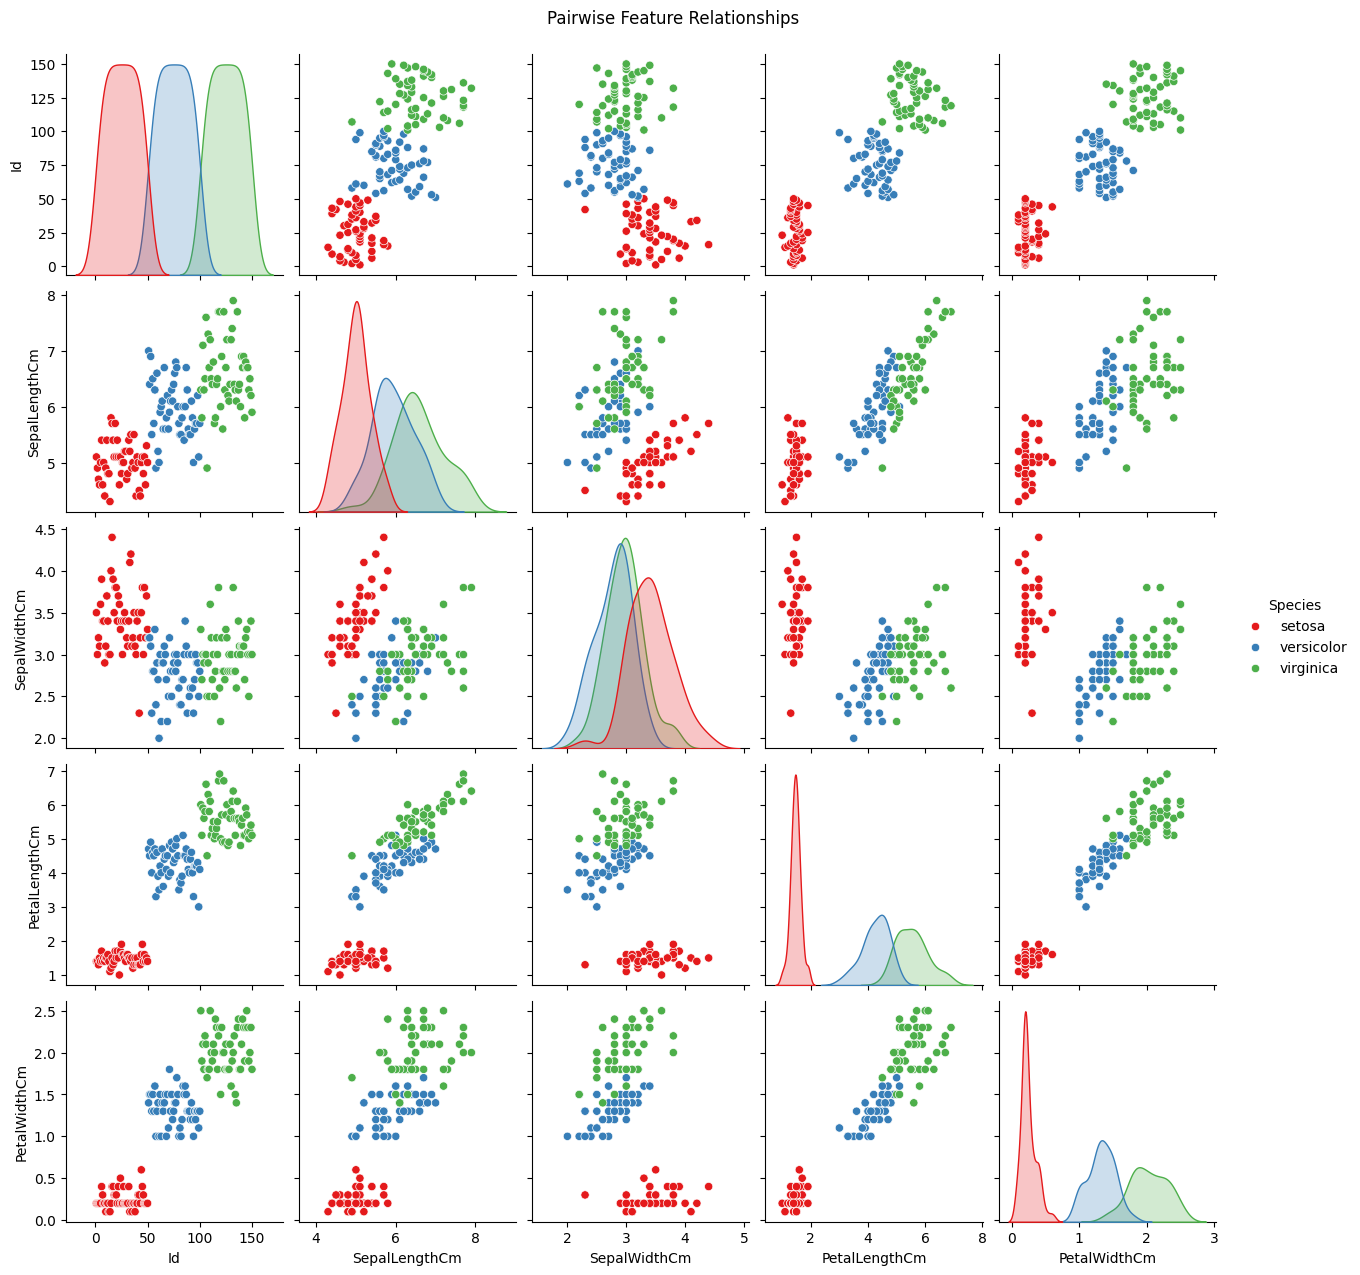

In [17]:
print("Pairwise Feature Relationships:")
g = sns.pairplot(df_clean, hue='Species', palette='Set1', diag_kind='kde', height=2.5)
g.fig.suptitle('Pairwise Feature Relationships', y=1.02)
plt.savefig('feature_relationships.png', dpi=120)
plt.show()


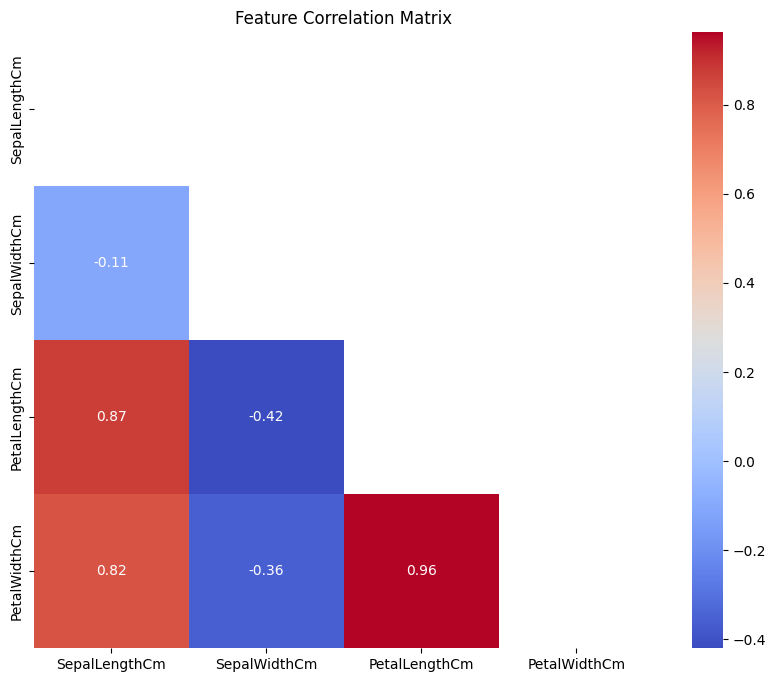

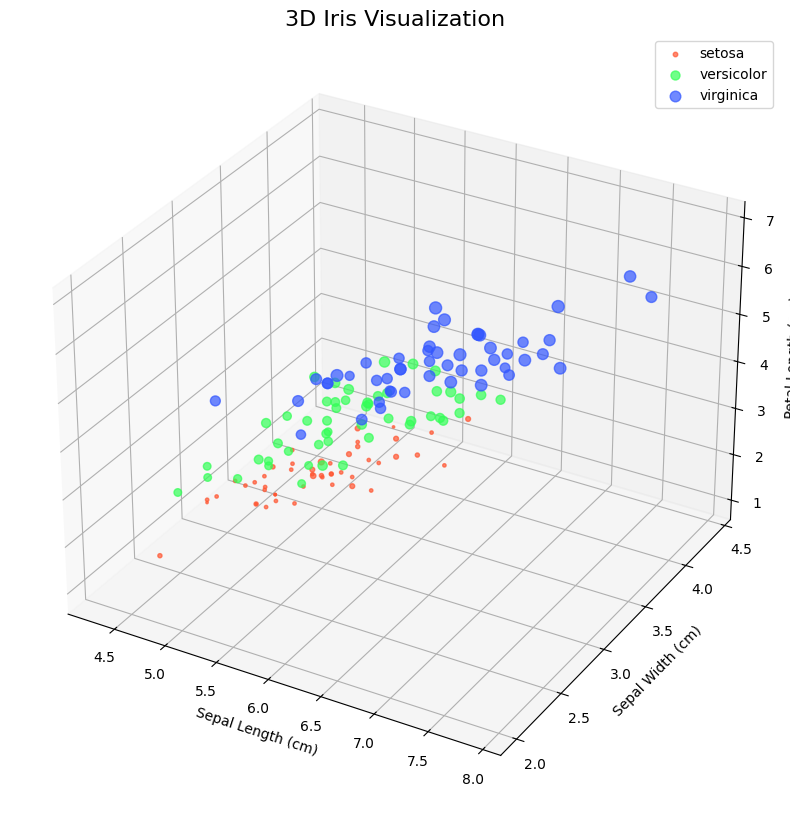

In [ ]:
plt.figure(figsize=(10, 8))
corr = df_clean[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', mask=np.triu(np.ones_like(corr)))
plt.title('Feature Correlation Matrix')
plt.savefig('correlation_matrix.png', dpi=120)
plt.show()

# Visualization 4: 3D Scatter Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

species_colors = {
    'setosa': '#FF5733',
    'versicolor': '#33FF57',
    'virginica': '#3357FF'
}

for species, group in df_clean.groupby('Species'):
    ax.scatter(
        group['SepalLengthCm'], 
        group['SepalWidthCm'], 
        group['PetalLengthCm'],
        s=group['PetalWidthCm']*30,
        c=species_colors[species],
        label=species,
        alpha=0.7,
        depthshade=True
    )

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Iris Visualization', fontsize=16)
ax.legend()
plt.savefig('3d_visualization.png', dpi=120)
plt.show()